In [22]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3.csv')
used_columns = ["Height", "BMI", "Age"]
bio_by_sport = df.groupby(['Event'])[used_columns].median().reset_index()

In [23]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Height', 'BMI', 'Age']

scaler = StandardScaler()

means = bio_by_sport[columns_to_normalize].mean()
stdvs = bio_by_sport[columns_to_normalize].std()

bio_by_sport[columns_to_normalize] = scaler.fit_transform(bio_by_sport[columns_to_normalize])

bio_by_sport.head()

,Event,Height,BMI,Age
0,Archery Men's Individual,0.425328,0.249082,0.241315
1,Archery Men's Team,0.669773,0.282596,-0.058637
2,Archery Women's Individual,-0.796896,-0.455323,-0.058637
3,Archery Women's Team,-0.796896,-0.351119,-0.358589
4,"Athletics Men's 1,500 metres",0.425328,-0.811084,-0.358589


In [24]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age', 'BMI']])
    score = silhouette_score(bio_by_sport[['Height', 'Age', 'BMI']], clusters)
    silhouette_scores.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
3,5,0.287220
5,7,0.300375
6,8,0.302734
8,10,0.306588
4,6,0.308978
7,9,0.312570
0,2,0.330049
1,3,0.363990
2,4,0.376575


In [25]:
# Define average values for males and females
AVG_HEIGHT_MALE = (178.4 - means["Height"]) / stdvs["Height"]  # cm
AVG_BMI_MALE = (25.5 - means["BMI"]) / stdvs["BMI"]
AVG_AGE_MALE = (31 - means["Age"]) / stdvs["Age"]

AVG_HEIGHT_FEMALE = (164.7 - means["Height"]) / stdvs["Height"]
AVG_BMI_FEMALE = (24.7 - means["BMI"]) / stdvs["BMI"]
AVG_AGE_FEMALE = (32 - means["Age"]) / stdvs["Age"]

# Append global averages for both males and females
bio_by_sport = bio_by_sport._append({'Event': 'Global average Male',
                                      'Height': AVG_HEIGHT_MALE,
                                      'BMI': AVG_BMI_MALE,
                                      'Age': AVG_AGE_MALE}, ignore_index=True)

bio_by_sport = bio_by_sport._append({'Event': 'Global average Female',
                                      'Height': AVG_HEIGHT_FEMALE,
                                      'BMI': AVG_BMI_FEMALE,
                                      'Age': AVG_AGE_FEMALE}, ignore_index=True)

# Display the updated DataFrame
bio_by_sport.head()


,Event,Height,BMI,Age
0,Archery Men's Individual,0.425328,0.249082,0.241315
1,Archery Men's Team,0.669773,0.282596,-0.058637
2,Archery Women's Individual,-0.796896,-0.455323,-0.058637
3,Archery Women's Team,-0.796896,-0.351119,-0.358589
4,"Athletics Men's 1,500 metres",0.425328,-0.811084,-0.358589


In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[used_columns])
bio_by_sport.sort_values(by='Cluster')

,Event,Height,BMI,Age,Cluster
339,Taekwondo Women's Flyweight,-1.285786,-1.671458,-0.958493,0
382,"Wrestling Men's Light-Flyweight, Greco-Roman",-2.141343,-0.959593,-0.658541,0
321,Swimming Women's 400 metres Freestyle,-0.552451,-0.804795,-2.158301,0
320,Swimming Women's 4 x 200 metres Freestyle Relay,0.058661,-0.780656,-1.558397,0
322,Swimming Women's 400 metres Individual Medley,-0.552451,-0.796709,-2.158301,0
...,...,...,...,...,...
359,Weightlifting Men's Heavyweight I,0.303105,3.041652,-0.058637,4
358,Weightlifting Men's Heavyweight,0.669773,3.643522,0.241315,4
360,Weightlifting Men's Heavyweight II,0.791995,3.545073,0.241315,4
390,"Wrestling Men's Super-Heavyweight, Greco-Roman",1.769774,3.869999,0.241315,4


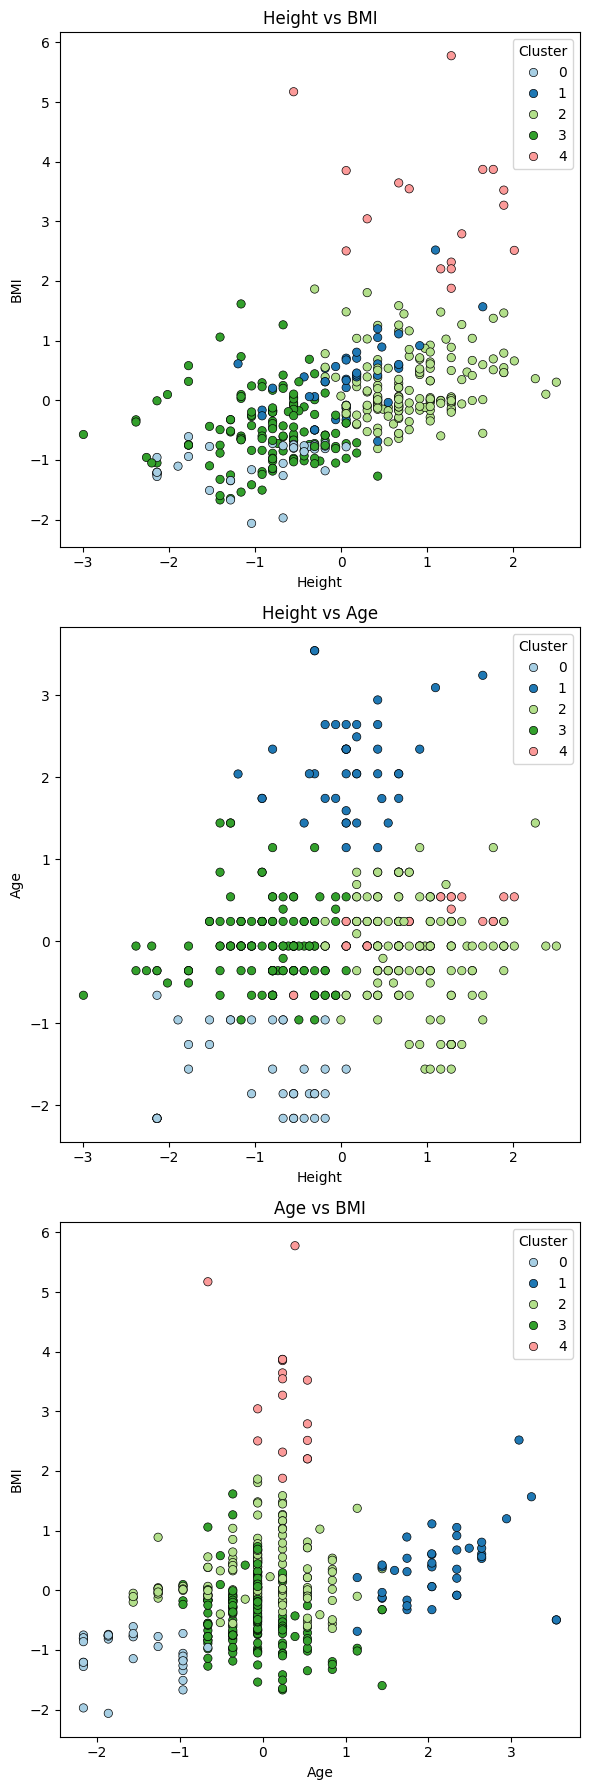

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=bio_by_sport, x='Height', y='BMI', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[0])
axes[0].set_title('Height vs BMI')

sns.scatterplot(data=bio_by_sport, x='Height', y='Age', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[1])
axes[1].set_title('Height vs Age')

sns.scatterplot(data=bio_by_sport, x='Age', y='BMI', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[2])
axes[2].set_title('Age vs BMI')

plt.tight_layout()
plt.show()

In [30]:
import numpy as  np

target_row = bio_by_sport.loc[bio_by_sport['Event'] == 'Global average Male']

bio_by_sport['distance'] = bio_by_sport[used_columns].apply(
    lambda row: np.linalg.norm(row.values - target_row[used_columns].values), axis=1
)

df_sorted = bio_by_sport.sort_values(by='distance').reset_index(drop=True)

print(df_sorted[["Event", "Cluster", "distance"]])

                                        Event  Cluster  distance
0                         Global average Male        1  0.000000
1                       Golf Men's Individual        1  0.406587
2                  Shooting Men's Double Trap        1  0.422273
3         Sailing Mixed Three Person Keelboat        1  0.464162
4                      Sailing Mixed 6 metres        1  0.563978
..                                        ...      ...       ...
396         Gymnastics Women's Floor Exercise        0  5.142057
397           Gymnastics Women's Balance Beam        0  5.146478
398  Gymnastics Women's Individual All-Around        0  5.150415
399            Gymnastics Women's Horse Vault        0  5.156291
400        Gymnastics Women's Team All-Around        0  5.170872

[401 rows x 3 columns]


In [29]:
import numpy as  np

target_row = bio_by_sport.loc[bio_by_sport['Event'] == 'Global average Female']

bio_by_sport['distance'] = bio_by_sport[used_columns].apply(
    lambda row: np.linalg.norm(row.values - target_row[used_columns].values), axis=1
)

df_sorted = bio_by_sport.sort_values(by='distance').reset_index(drop=True)

print(df_sorted[["Event", "Cluster", "distance"]])

                                              Event  Cluster  distance
0                             Global average Female        1  0.000000
1                             Shooting Women's Trap        1  0.648129
2                      Shooting Women's Double Trap        1  0.877809
3                            Shooting Women's Skeet        1  0.962734
4                 Equestrianism Men's Jumping, Team        1  0.995725
..                                              ...      ...       ...
396          Rhythmic Gymnastics Women's Individual        0  4.729198
397  Wrestling Men's Super-Heavyweight, Greco-Roman        4  4.760793
398               Rhythmic Gymnastics Women's Group        0  4.956271
399         Weightlifting Women's Super-Heavyweight        4  5.338458
400           Weightlifting Men's Super-Heavyweight        4  5.961995

[401 rows x 3 columns]
